# Optimizing customer acquisition funnel using A-B test

Customer acquisition funnel is a process/place where you turn prospects into customers. Is it optimized? 

Do you have a high number of visitors coming to your website, and only a very few are converting into customers?
Do You have plenty of users who sign up for free trials, but many of them aren’t converting into paying customers?

This is an indication that your customer acquisition funnel isn’t optimized.

In this project, I will analyze the customer Acquistition funnel of a Gym named <b>BodyWorks</b>. BodyWorks has an SQLite database, which contains several tables that will be helpful in this investigation:

- <b> visits</b> -contains information about potential gym customers who have visited MuscleHub
- <b> fitness_tests</b> -contains information about potential customers in "Group A", who were given a fitness test
- <b> applications</b> -contains information about any potential customers (both "Group A" and "Group B") who filled out an application. Not everyone in visits will have filled out an application.
- <b> purchases</b> -contains information about customers who purchased a membership to MuscleHub.

I have downloaded the data from their database into csv files, which i will load into a Jupyter Notebook using Python Pandas.

### Step 1: Retrieving the Data
First, I will import all relative python libraries and obtain our data

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
visits = pd.read_csv(r'C:\Users\wikie\Documents\Datasets\Bodyworks\visits.csv')

In [8]:
fitness_tests = pd.read_csv(r'C:\Users\wikie\Documents\Datasets\Bodyworks\fitness_tests.csv')

In [9]:
applications = pd.read_csv(r'C:\Users\wikie\Documents\Datasets\Bodyworks\applications.csv')

In [10]:
purchases = pd.read_csv(r'C:\Users\wikie\Documents\Datasets\Bodyworks\purchases.csv')

### Step 2:  Exploratory Data analysis
Let's see what this data looks like.

In [27]:
# view the top five records of the VISITS table
visits.head()

,first_name,last_name,email,gender,visit_date
0,Karen,Manning,Karen.Manning@gmail.com,female,5/1/2017
1,Annette,Boone,AB9982@gmail.com,female,5/1/2017
2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5/1/2017
3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5/1/2017
4,Andre,Mayer,AndreMayer90@gmail.com,male,5/1/2017


In [30]:
#Check for missing values in the visits table
visits.isnull()

,first_name,last_name,email,gender,visit_date
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
5995,False,False,False,False,False
5996,False,False,False,False,False
5997,False,False,False,False,False
5998,False,False,False,False,False


Notice there are 6000 rows and 5 columns in the visits table. There are no null values.

In [13]:
# view the top five records of the FITNESS_TESTS table
fitness_tests.head()

,first_name,last_name,email,gender,fitness_test_date
0,Kim,Walter,KimWalter58@gmail.com,female,7/3/2017
1,Tom,Webster,TW3857@gmail.com,male,7/2/2017
2,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7/1/2017
3,Roberta,Best,RB6305@hotmail.com,female,7/2/2017
4,Carrie,Francis,CF1896@hotmail.com,female,7/5/2017


In [14]:
# view the top five records of the APPLICATIONS table
applications.head()

,first_name,last_name,email,gender,application_date
0,Roy,Abbott,RoyAbbott32@gmail.com,male,8/12/2017
1,Agnes,Acevedo,AgnesAcevedo1@gmail.com,female,9/29/2017
2,Roberta,Acevedo,RA8063@gmail.com,female,9/15/2017
3,Darren,Acosta,DAcosta1996@hotmail.com,male,7/26/2017
4,Vernon,Acosta,VAcosta1975@gmail.com,male,7/14/2017


In [15]:
# view the top five records of the purchases table
purchases.head()

,first_name,last_name,email,gender,purchase_date
0,Roy,Abbott,RoyAbbott32@gmail.com,male,8/18/2017
1,Roberta,Acevedo,RA8063@gmail.com,female,9/16/2017
2,Vernon,Acosta,VAcosta1975@gmail.com,male,7/20/2017
3,Darren,Acosta,DAcosta1996@hotmail.com,male,7/27/2017
4,Dawn,Adkins,Dawn.Adkins@gmail.com,female,8/24/2017


###  Step 3: Merge Tables
OK. Now I have all my four tables.
I want to write a query that does the following things:

- Not all visits in VISITS occurred during the A/B test. I only want to pull data where visit_date is on or after 7-1-17.

- I want to perform a series of LEFT JOIN commands to combine the four tables that I care about. I'll need to perform the joins on first_name, last_name, and email. Pull the following columns:

1. visits.first_name
2. visits.last_name
3. visits.gender
4. visits.email
5. visits.visit_date
6. fitness_tests.fitness_test_date
7. applications.application_date
8. purchases.purchase_date

- Save the result of this query to a variable called df

#### Check if visit_time column is datetime object

In [35]:
print(visits.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   first_name  6000 non-null   object
 1   last_name   6000 non-null   object
 2   email       6000 non-null   object
 3   gender      6000 non-null   object
 4   visit_date  6000 non-null   object
dtypes: object(5)
memory usage: 234.5+ KB
None


In [36]:
print(type(visits.visit_date[0]))

<class 'str'>


#### original is str, need to change it to datetime

In [39]:
from datetime import datetime

In [41]:
visits["VisitDate"] =  pd.to_datetime(visits["visit_date"])

In [44]:
visits.head(5)

,first_name,last_name,email,gender,visit_date,VisitDate
0,Karen,Manning,Karen.Manning@gmail.com,female,5/1/2017,2017-05-01
1,Annette,Boone,AB9982@gmail.com,female,5/1/2017,2017-05-01
2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5/1/2017,2017-05-01
3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5/1/2017,2017-05-01
4,Andre,Mayer,AndreMayer90@gmail.com,male,5/1/2017,2017-05-01


#### I will now create a table for visits done after 7-1-17.

In [45]:
visits1 = visits[visits.VisitDate >= '2017-07-01']
visits1.head(5)

,first_name,last_name,email,gender,visit_date,VisitDate
1000,Kim,Walter,KimWalter58@gmail.com,female,7/1/2017,2017-07-01
1001,Tom,Webster,TW3857@gmail.com,male,7/1/2017,2017-07-01
1002,Edward,Bowen,Edward.Bowen@gmail.com,male,7/1/2017,2017-07-01
1003,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7/1/2017,2017-07-01
1004,Roberta,Best,RB6305@hotmail.com,female,7/1/2017,2017-07-01


#### Merge Tables

In [50]:
merge_on = ['first_name', 'last_name', 'gender', 'email']

merged = visits1.merge(fitness_tests, on=merge_on, how='left').merge(applications, on=merge_on, how='left').merge(purchases, on=merge_on, how='left')

#### View length of the merged table

In [51]:
print(len(merged))

5004


#### View top five records of the merged table

In [53]:
merged.head(5)

,first_name,last_name,email,gender,visit_date,VisitDate,fitness_test_date,application_date,purchase_date
0,Kim,Walter,KimWalter58@gmail.com,female,7/1/2017,2017-07-01,7/3/2017,NaN,NaN
1,Tom,Webster,TW3857@gmail.com,male,7/1/2017,2017-07-01,7/2/2017,NaN,NaN
2,Edward,Bowen,Edward.Bowen@gmail.com,male,7/1/2017,2017-07-01,NaN,7/4/2017,7/4/2017
3,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7/1/2017,2017-07-01,7/1/2017,7/3/2017,7/5/2017
4,Roberta,Best,RB6305@hotmail.com,female,7/1/2017,2017-07-01,7/2/2017,NaN,NaN


### Step 4: Investigate the A and B groups

I am going to add some columns to df to help with my analysis.

I will start by adding a column called ab_test_group. It should be A if fitness_test_date is not None, and B if fitness_test_date is None

In [54]:
df = merged
df['ab_test_group'] = df.fitness_test_date.apply(lambda x: 'B' if pd.isnull(x) else 'A')
df.head(5)

,first_name,last_name,email,gender,visit_date,VisitDate,fitness_test_date,application_date,purchase_date,ab_test_group
0,Kim,Walter,KimWalter58@gmail.com,female,7/1/2017,2017-07-01,7/3/2017,NaN,NaN,A
1,Tom,Webster,TW3857@gmail.com,male,7/1/2017,2017-07-01,7/2/2017,NaN,NaN,A
2,Edward,Bowen,Edward.Bowen@gmail.com,male,7/1/2017,2017-07-01,NaN,7/4/2017,7/4/2017,B
3,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7/1/2017,2017-07-01,7/1/2017,7/3/2017,7/5/2017,A
4,Roberta,Best,RB6305@hotmail.com,female,7/1/2017,2017-07-01,7/2/2017,NaN,NaN,A


Let's do a quick sanity check that the visitors are split such that about half are in A and half are in B.

I will Start by using groupby to count how many users are in each ab_test_group. Save the results to ab_counts.

In [55]:
ab_counts = df.groupby('ab_test_group').count()
ab_counts

,first_name,last_name,email,gender,visit_date,VisitDate,fitness_test_date,application_date,purchase_date
ab_test_group,,,,,,,,,
A,2504,2504,2504,2504,2504,2504,2504,250,200
B,2500,2500,2500,2500,2500,2500,0,325,250


I'll want to include this information in my presentation. I will create a pie chart using plt.pie.

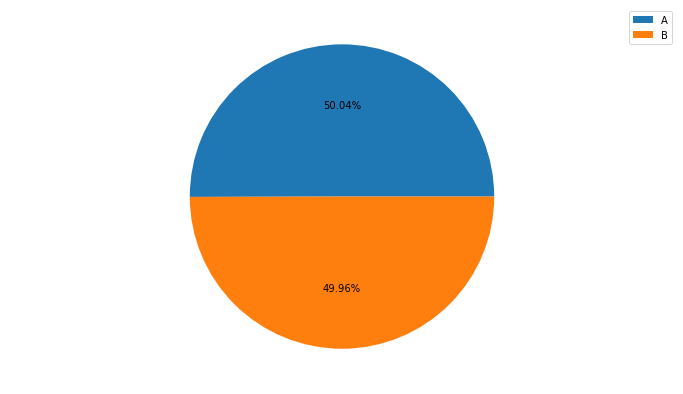

In [56]:
plt.figure(figsize=(12,7))
plt.axis('equal')
plt.pie(ab_counts.email, autopct='%1.2f%%')
plt.legend(['A','B'])

### Step 5: Who picks up an application?
Remember that the sign-up process for BodyWorks has several steps:

1. Take a fitness test with a personal trainer (only Group A)
2. Fill out an application for the gym
3. Send in their payment for their first month's membership

Let's examine how many people make it to Step 2, filling out an application.

I will start by creating a new column in df called is_application which is Application if application_date is not None and No Application, otherwise.

In [57]:
df['is_application'] = df.application_date.apply(lambda x: 'No Application' if pd.isnull(x) else 'Application')
df.head(5)

,first_name,last_name,email,gender,visit_date,VisitDate,fitness_test_date,application_date,purchase_date,ab_test_group,is_application
0,Kim,Walter,KimWalter58@gmail.com,female,7/1/2017,2017-07-01,7/3/2017,NaN,NaN,A,No Application
1,Tom,Webster,TW3857@gmail.com,male,7/1/2017,2017-07-01,7/2/2017,NaN,NaN,A,No Application
2,Edward,Bowen,Edward.Bowen@gmail.com,male,7/1/2017,2017-07-01,NaN,7/4/2017,7/4/2017,B,Application
3,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7/1/2017,2017-07-01,7/1/2017,7/3/2017,7/5/2017,A,Application
4,Roberta,Best,RB6305@hotmail.com,female,7/1/2017,2017-07-01,7/2/2017,NaN,NaN,A,No Application


Now, using groupby, i will count how many people from Group A and Group B either do or don't pick up an application. I want to group by ab_test_group and is_application. I wii save this new DataFrame as app_counts.

In [58]:
app_counts = df.groupby(['ab_test_group', 'is_application']).count().reset_index()
app_counts

,ab_test_group,is_application,first_name,last_name,email,gender,visit_date,VisitDate,fitness_test_date,application_date,purchase_date
0,A,Application,250,250,250,250,250,250,250,250,200
1,A,No Application,2254,2254,2254,2254,2254,2254,2254,0,0
2,B,Application,325,325,325,325,325,325,0,325,250
3,B,No Application,2175,2175,2175,2175,2175,2175,0,0,0


I am going to calculate the percent of people in each group who complete an application. It's going to be much easier to do this if I pivot app_counts such that:

- The index is ab_test_group
- The columns are is_application Perform this pivot and save it to the variable app_pivot. 
I will call reset_index() at the end of the pivot!

In [59]:
app_pivot = app_counts.pivot(index='ab_test_group', columns='is_application',values='email').reset_index()
app_pivot

is_application,ab_test_group,Application,No Application
0,A,250,2254
1,B,325,2175


I will define a new column called Total, which is the sum of Application and No Application

In [60]:
app_pivot['Total'] = app_pivot['Application'] + app_pivot['No Application']
app_pivot

is_application,ab_test_group,Application,No Application,Total
0,A,250,2254,2504
1,B,325,2175,2500


I will do another column called Percent with Application, which is equal to Application divided by Total

In [61]:
app_pivot['Percent with Application'] = app_pivot['Application'] / app_pivot['Total']
app_pivot

is_application,ab_test_group,Application,No Application,Total,Percent with Application
0,A,250,2254,2504,0.09984
1,B,325,2175,2500,0.13000


It looks like more people from Group B turned in an application. Why might that be?

I need to know if this difference is statistically significant.

I will now Choose a hypothesis test, import it from scipy and perform it.

In [62]:
from scipy.stats import chi2_contingency

In [63]:
X = [[250, 2254], 
    [325, 2175]]
chi2, pval, dof, expected = chi2_contingency(X)

In [64]:
print("chi2 test statistic is {0:.10f}".format(chi2))

chi2 test statistic is 10.8939612953


In [65]:
print("pval is {0:.10f}".format(pval))

pval is 0.0009647828


In [66]:
print("dof is {}".format(dof))

dof is 1


In [67]:
print("expected is {}".format(expected))

expected is [[ 287.72981615 2216.27018385]
 [ 287.27018385 2212.72981615]]


#### conclusion
We get pval = 0.001 < 0.05. In this case, the null hypothesis is that there’s no significant difference between the data in A and B. \
We reject that hypothesis, which means people that appeared in fitness test are more likely to proceed with an application.

### Step 6: Who purchases a membership?

Of those who picked up an application, how many purchased a membership?

I'll begin by adding a column to df called is_member which is Member if purchase_date is not None, and Not Member otherwise.

In [68]:
df['is_member'] = df.purchase_date.apply(lambda x: 'Not Member' if pd.isnull(x) else 'Member')
df.head(5)

,first_name,last_name,email,gender,visit_date,VisitDate,fitness_test_date,application_date,purchase_date,ab_test_group,is_application,is_member
0,Kim,Walter,KimWalter58@gmail.com,female,7/1/2017,2017-07-01,7/3/2017,NaN,NaN,A,No Application,Not Member
1,Tom,Webster,TW3857@gmail.com,male,7/1/2017,2017-07-01,7/2/2017,NaN,NaN,A,No Application,Not Member
2,Edward,Bowen,Edward.Bowen@gmail.com,male,7/1/2017,2017-07-01,NaN,7/4/2017,7/4/2017,B,Application,Member
3,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7/1/2017,2017-07-01,7/1/2017,7/3/2017,7/5/2017,A,Application,Member
4,Roberta,Best,RB6305@hotmail.com,female,7/1/2017,2017-07-01,7/2/2017,NaN,NaN,A,No Application,Not Member


Now, I'll create a DataFrame called just_apps that contains only people who picked up an application.

In [69]:
just_apps = df[df.is_application == 'Application']
just_apps.head(5)

,first_name,last_name,email,gender,visit_date,VisitDate,fitness_test_date,application_date,purchase_date,ab_test_group,is_application,is_member
2,Edward,Bowen,Edward.Bowen@gmail.com,male,7/1/2017,2017-07-01,NaN,7/4/2017,7/4/2017,B,Application,Member
3,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7/1/2017,2017-07-01,7/1/2017,7/3/2017,7/5/2017,A,Application,Member
9,Salvador,Cardenas,SCardenas1980@gmail.com,male,7/1/2017,2017-07-01,7/7/2017,7/6/2017,NaN,A,Application,Not Member
11,Valerie,Munoz,VMunoz1998@gmail.com,female,7/1/2017,2017-07-01,7/3/2017,7/5/2017,7/6/2017,A,Application,Member
35,Michael,Burks,MB9820@gmail.com,male,7/1/2017,2017-07-01,NaN,7/7/2017,7/13/2017,B,Application,Member


Now, I'll do a groupby to find out how many people in just_apps are and aren't members from each group. 


In [70]:
member_pivot = just_apps.groupby(['is_member','ab_test_group']).count().reset_index().pivot(index='ab_test_group', columns='is_member',values='email').reset_index()
member_pivot['Total'] = member_pivot['Member'] + member_pivot['Not Member']
member_pivot['Percent Purchase'] = member_pivot['Member'] / member_pivot['Total']

In [71]:
member_pivot

is_member,ab_test_group,Member,Not Member,Total,Percent Purchase
0,A,200,50,250,0.800000
1,B,250,75,325,0.769231


It looks like people who took the fitness test were more likely to purchase a membership if they picked up an application. Why might that be?

Just like before, I need to know if this difference is statistically significant. I will Choose a hypothesis test, import it from scipy and perform it. 


In [72]:
from scipy.stats import chi2_contingency

In [73]:
X = [[200, 50], 
     [250, 75]]
chi2, pval, dof, expected = chi2_contingency(X)

In [74]:
print("chi2 test statistic is {0:.10f}".format(chi2))

chi2 test statistic is 0.6158692308


In [75]:
print("pval is {0:.10f}".format(pval))

pval is 0.4325864605


In [76]:
print("dof is {}".format(dof))

dof is 1


In [77]:
print("expected is {}".format(expected))

expected is [[195.65217391  54.34782609]
 [254.34782609  70.65217391]]


#### conclusion
We get pval = 0.433 > 0.05. In this case, the null hypothesis is that there’s no significant difference between the data in A and B. We accept that hypothesis, which means among people who picked up applications, people that previously appeared in fit test are not more likely to proceed with purchasing membership.

Previously, I looked at what percent of people who picked up applications purchased memberships. What I really care about is what percentage of all visitors purchased memberships. 

Let me return to df and do a groupby to find out how many people in df are and aren't members from each group. 

In [80]:
final_member_pivot = df.groupby(['is_member','ab_test_group']).count().reset_index().pivot(index='ab_test_group', columns='is_member',values='email').reset_index()
final_member_pivot['Total'] = final_member_pivot['Member'] + final_member_pivot['Not Member']
final_member_pivot['Percent Purchase'] =final_member_pivot['Member'] / final_member_pivot['Total']

In [81]:
final_member_pivot

is_member,ab_test_group,Member,Not Member,Total,Percent Purchase
0,A,200,2304,2504,0.079872
1,B,250,2250,2500,0.100000


Previously, when I only considered people who had already picked up an application, we saw that there was no significant difference in membership between Group A and Group B.

Now, when we consider all people who visit <b>BodyWorks</b>, we see that there might be a significant difference in memberships between Group A and Group B. I will now perform a significance test and check.

In [82]:
X = [[200, 2304], 
     [250, 2250]]
chi2, pval, dof, expected = chi2_contingency(X)

In [83]:
print("chi2 test statistic is {0:.10f}".format(chi2))

chi2 test statistic is 5.9491822926


In [84]:
print("pval is {0:.10f}".format(pval))

pval is 0.0147241146


In [85]:
print("dof is {}".format(dof))

dof is 1


In [86]:
print("expected is {}".format(expected))

expected is [[ 225.17985612 2278.82014388]
 [ 224.82014388 2275.17985612]]


#### conclusion
We get pval = 0.015 < 0.05. In this case, the null hypothesis is that there’s no significant difference between the data in A and B. We reject that hypothesis, which means among all people who visit BodyWorks, people that previously appeared in fit test are more likely to proceed with purchasing membership.

### Step 5: Summary of the acquisition funel with a chart
I will now make a bar chart for BodyWorks that shows the difference between Group A (people who were given the fitness test) and Group B (people who were not given the fitness test) at each state of the process:

- Percent of visitors who apply
- Percent of applicants who purchase a membership
- Percent of visitors who purchase a membership


Text(0.5, 1.0, 'Percent of visitors who submitted application')

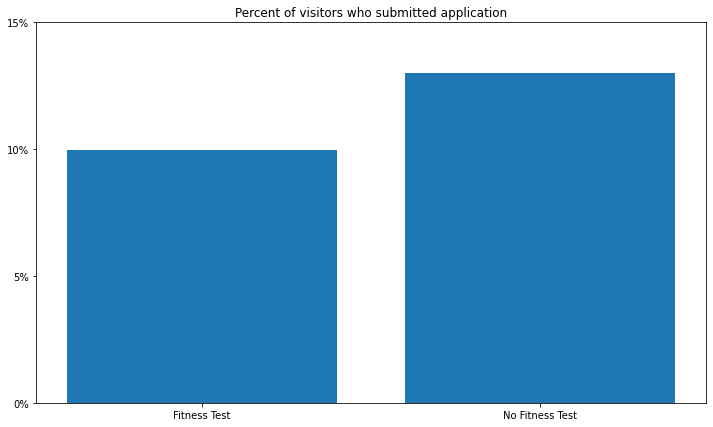

In [88]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(1, 1, 1)
height = np.array(app_pivot['Percent with Application'])
plt.bar(x=np.array(range(len(app_pivot))), height=height)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Fitness Test','No Fitness Test'])
ax.set_yticks([0, 0.05, 0.10, 0.15])
ax.set_yticklabels(['0%', '5%', '10%', '15%'])
plt.title("Percent of visitors who submitted application")

Text(0.5, 1.0, 'Percent of applicants who purchase membership ')

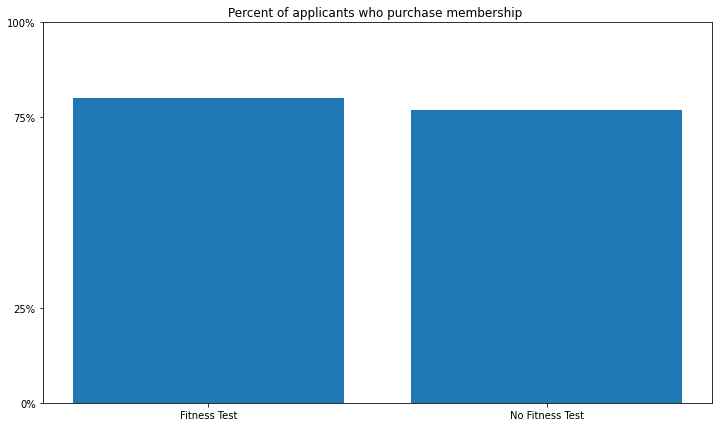

In [89]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(1, 1, 1)
height = np.array(member_pivot['Percent Purchase'])
plt.bar(x=np.array(range(len(member_pivot))), height=height)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Fitness Test','No Fitness Test'])
ax.set_yticks([0, 0.25, 0.75, 1])
ax.set_yticklabels(['0%', '25%', '75%', '100%'])
plt.title("Percent of applicants who purchase membership ")

Text(0.5, 1.0, 'Percent of visitors who purchase membership ')

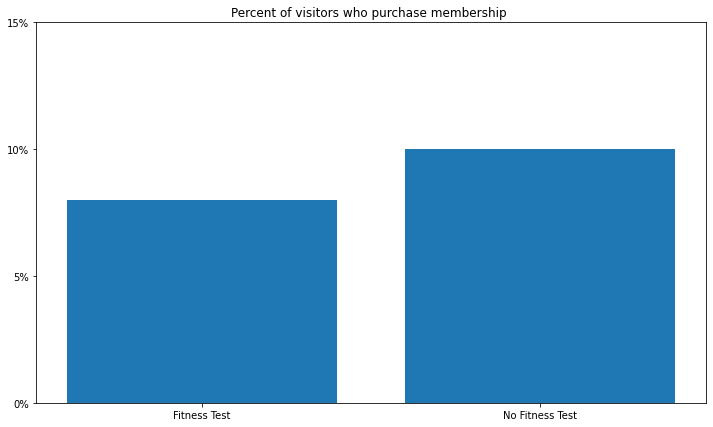

In [90]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(1, 1, 1)
height = np.array(final_member_pivot['Percent Purchase'])
plt.bar(x=np.array(range(len(final_member_pivot))), height=height)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Fitness Test','No Fitness Test'])
ax.set_yticks([0, 0.05, 0.10, 0.15])
ax.set_yticklabels(['0%', '5%', '10%', '15%'])
plt.title("Percent of visitors who purchase membership ")